In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Data Collection

In [5]:
now = datetime.now()
start = datetime(now.year-10,now.month,now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker,start,end,auto_adjust=False)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-08-05,25.845768,28.850000,29.360001,28.025000,28.237499,397250400
2015-08-06,25.902012,28.782499,29.125000,28.530001,28.992500,211612000
2015-08-07,25.989756,28.879999,29.062500,28.625000,28.645000,154681600
2015-08-10,26.934681,29.930000,29.997499,29.132500,29.132500,219806400
2015-08-11,25.533051,28.372499,29.545000,28.332500,29.452499,388331200
...,...,...,...,...,...,...
2025-07-29,211.270004,211.270004,214.809998,210.820007,214.179993,51411700
2025-07-30,209.050003,209.050003,212.389999,207.720001,211.899994,45512500


# Data Exploration and Visualization

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape


(2514, 6)

In [8]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [9]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.002547,107.129006,108.206467,105.945181,107.031713,1.083056e+08
std,69.248552,68.817074,69.497286,68.062984,68.750824,6.320944e+07
min,20.647457,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,39.679913,42.171251,42.617500,41.726249,42.248126,6.588608e+07
50%,103.667587,106.549999,108.302502,101.962498,103.712502,9.338010e+07
75%,165.954811,167.945000,169.867496,166.619999,168.485004,1.311568e+08
max,258.396667,259.019989,260.100006,257.630005,258.190002,6.488252e+08


In [10]:
df = df.reset_index()

In [11]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-05,25.845768,28.850000,29.360001,28.025000,28.237499,397250400
1,2015-08-06,25.902012,28.782499,29.125000,28.530001,28.992500,211612000
2,2015-08-07,25.989756,28.879999,29.062500,28.625000,28.645000,154681600
3,2015-08-10,26.934681,29.930000,29.997499,29.132500,29.132500,219806400
4,2015-08-11,25.533051,28.372499,29.545000,28.332500,29.452499,388331200


Text(0, 0.5, 'Close Price')

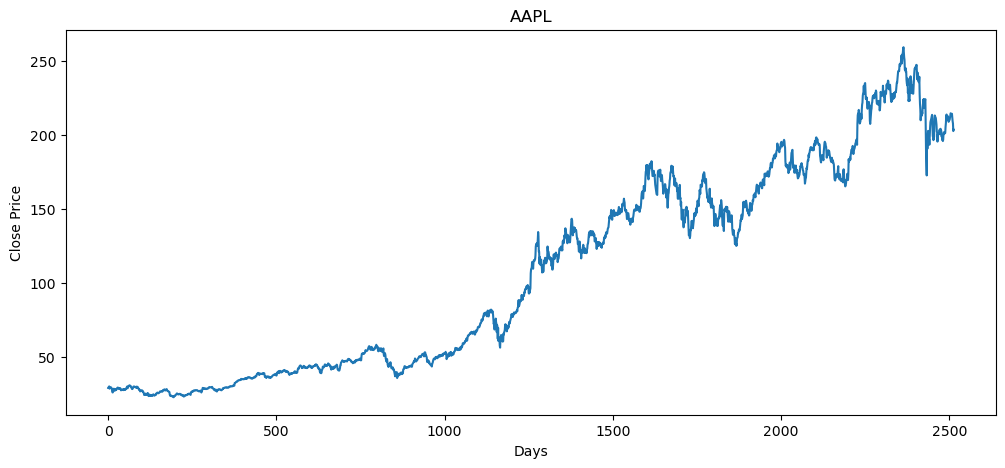

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# Feature Engineering

### 100 Days Moving Average

In [13]:
df['MA_100']=df.Close.rolling(100).mean()

In [14]:
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-05,25.845768,28.850000,29.360001,28.025000,28.237499,397250400,NaN
1,2015-08-06,25.902012,28.782499,29.125000,28.530001,28.992500,211612000,NaN
2,2015-08-07,25.989756,28.879999,29.062500,28.625000,28.645000,154681600,NaN
3,2015-08-10,26.934681,29.930000,29.997499,29.132500,29.132500,219806400,NaN
4,2015-08-11,25.533051,28.372499,29.545000,28.332500,29.452499,388331200,NaN
...,...,...,...,...,...,...,...,...
98,2015-12-23,24.539742,27.152500,27.212500,26.799999,26.817499,130629600,NaN
99,2015-12-24,24.408691,27.007500,27.250000,26.987499,27.250000,54281600,28.509950
100,2015-12-28,24.135298,26.705000,26.922501,26.545000,26.897499,106816800,28.488500


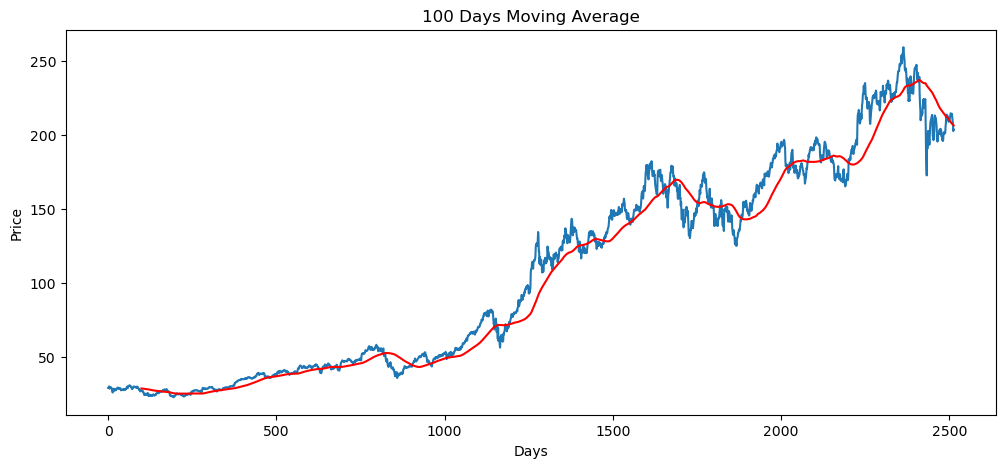

In [15]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA_100'],'r' );
plt.title('100 Days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');


### 200 Days Moving Average

In [16]:
df['MA_200']=df.Close.rolling(200).mean()

In [17]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-05,25.845768,28.850000,29.360001,28.025000,28.237499,397250400,NaN,NaN
1,2015-08-06,25.902012,28.782499,29.125000,28.530001,28.992500,211612000,NaN,NaN
2,2015-08-07,25.989756,28.879999,29.062500,28.625000,28.645000,154681600,NaN,NaN
3,2015-08-10,26.934681,29.930000,29.997499,29.132500,29.132500,219806400,NaN,NaN
4,2015-08-11,25.533051,28.372499,29.545000,28.332500,29.452499,388331200,NaN,NaN


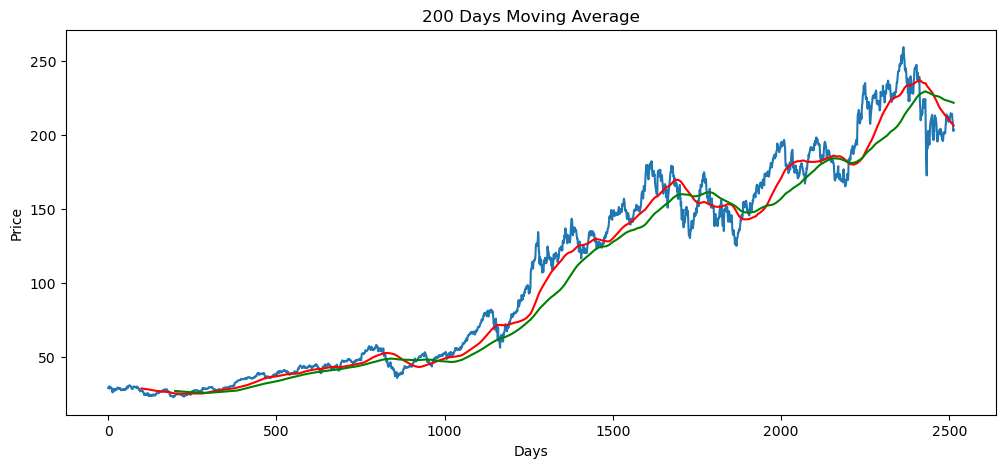

In [18]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA_100'],'r' );
plt.plot(df['MA_200'],'g' );
plt.title('200 Days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

In [19]:
df['Percentage Changed']= df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,28.850000,NaN
1,28.782499,-0.002340
2,28.879999,0.003387
3,29.930000,0.036357
4,28.372499,-0.052038
...,...,...
2509,211.270004,-0.012988
2510,209.050003,-0.010508
2511,207.570007,-0.007080


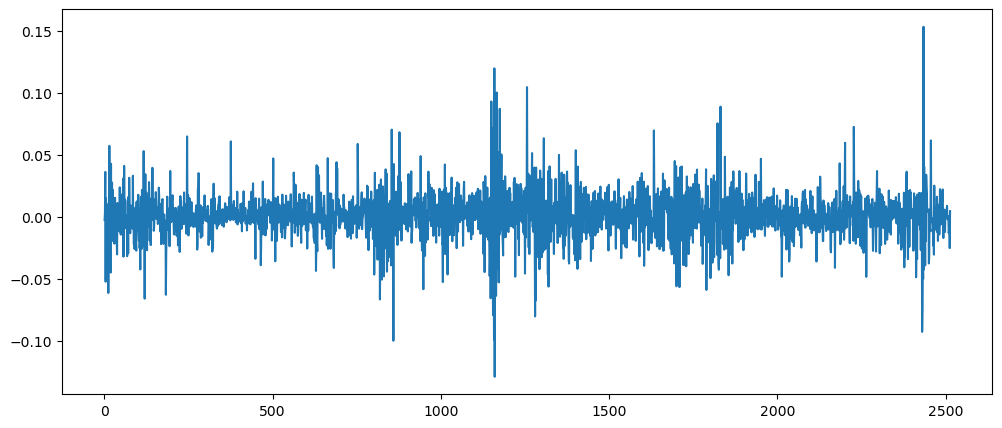

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# Data Preprocessing

In [21]:
df.shape

(2514, 10)

##### Splitting Data Into Training and Testing Dataset

In [22]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [23]:
print(data_training)
print(data_testing)

Ticker        AAPL
0        28.850000
1        28.782499
2        28.879999
3        29.930000
4        28.372499
...            ...
1754    152.949997
1755    151.600006
1756    156.789993
1757    157.350006
1758    162.509995

[1759 rows x 1 columns]
Ticker        AAPL
1759    161.509995
1760    160.009995
1761    166.130005
1762    165.809998
1763    165.350006
...            ...
2509    211.270004
2510    209.050003
2511    207.570007
2512    202.380005
2513    203.350006

[755 rows x 1 columns]


In [24]:
# Scaling down the data b/w 0 and 1

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03929748],
       [0.03887408],
       [0.03948565],
       ...,
       [0.84180648],
       [0.84531918],
       [0.87768543]], shape=(1759, 1))

# Sequence Creation

In [29]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [30]:
x_train

array([[[0.03929748],
        [0.03887408],
        [0.03948565],
        ...,
        [0.02648582],
        [0.02864984],
        [0.02774032]],

       [[0.03887408],
        [0.03948565],
        [0.04607183],
        ...,
        [0.02864984],
        [0.02774032],
        [0.02584288]],

       [[0.03948565],
        [0.04607183],
        [0.03630234],
        ...,
        [0.02774032],
        [0.02584288],
        [0.0288537 ]],

       ...,

       [[0.90101929],
        [0.88182533],
        [0.85755062],
        ...,
        [0.82487064],
        [0.81771994],
        [0.80925207]],

       [[0.88182533],
        [0.85755062],
        [0.84588369],
        ...,
        [0.81771994],
        [0.80925207],
        [0.84180648]],

       [[0.85755062],
        [0.84588369],
        [0.88044536],
        ...,
        [0.80925207],
        [0.84180648],
        [0.84531918]]], shape=(1659, 100, 1))

# Model Building

In [33]:
import tensorflow as tf

In [37]:
# Ml Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [39]:
model = Sequential()
model.add(Input (shape=(100,1)))
model.add(LSTM(units=128,activation = 'tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# Model Training

In [42]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0107
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.5919e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.4333e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.0402e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.8635e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.3859e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.6656e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.9431e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.2634e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.1592e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.6060e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.7606e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 3.9952e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.8739e-04
Epoch 15/50
52/52 ━

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
#save the model 

In [45]:
model.save('stock_prediction_model.keras')

# Preparing Test Data

In [46]:
data_testing

Ticker,AAPL
1759,161.509995
1760,160.009995
1761,166.130005
1762,165.809998
1763,165.350006
...,...
2509,211.270004
2510,209.050003
2511,207.570007
2512,202.380005


In [47]:
past_100_days = data_training.tail(100)

In [48]:
past_100_days

Ticker,AAPL
1659,157.440002
1660,162.949997
1661,158.520004
1662,154.729996
1663,150.619995
...,...
1754,152.949997
1755,151.600006
1756,156.789993
1757,157.350006


In [49]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,157.440002
1,162.949997
2,158.520004
3,154.729996
4,150.619995
...,...
850,211.270004
851,209.050003
852,207.570007
853,202.380005


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.41940356e-01],
       [2.83059720e-01],
       [2.50000071e-01],
       [2.21716424e-01],
       [1.91044776e-01],
       [2.24402996e-01],
       [2.57985087e-01],
       [2.65671646e-01],
       [2.90746278e-01],
       [3.01194108e-01],
       [3.26865770e-01],
       [3.37238900e-01],
       [3.66044877e-01],
       [3.70895578e-01],
       [3.77462779e-01],
       [4.02537412e-01],
       [3.93656796e-01],
       [3.70074678e-01],
       [3.67835849e-01],
       [3.98656782e-01],
       [3.73432864e-01],
       [3.49328417e-01],
       [3.51641832e-01],
       [3.36343300e-01],
       [3.03955266e-01],
       [3.18209026e-01],
       [3.38656715e-01],
       [3.00522380e-01],
       [2.98880694e-01],
       [3.16268654e-01],
       [3.15000011e-01],
       [3.08955253e-01],
       [2.74402976e-01],
       [2.82537391e-01],
       [2.37164240e-01],
       [2.35447854e-01],
       [2.88208992e-01],
       [2.43507456e-01],
       [2.45820985e-01],
       [2.57164187e-01],


In [51]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [52]:
x_test,y_test = np.array(x_test),np.array(y_test)

# Making Prediction

In [53]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [54]:
y_predicted

array([[0.24173115],
       [0.25704646],
       [0.26091868],
       [0.27552235],
       [0.2875678 ],
       [0.29323393],
       [0.29340827],
       [0.2918632 ],
       [0.30208254],
       [0.31045228],
       [0.3252977 ],
       [0.3397181 ],
       [0.3480813 ],
       [0.3555792 ],
       [0.3586634 ],
       [0.35171106],
       [0.33337983],
       [0.3178049 ],
       [0.3099326 ],
       [0.3146082 ],
       [0.30422568],
       [0.28725395],
       [0.26787987],
       [0.25044188],
       [0.2418179 ],
       [0.23376423],
       [0.22558907],
       [0.22375214],
       [0.2208826 ],
       [0.22590831],
       [0.24734683],
       [0.24221438],
       [0.23366135],
       [0.21926059],
       [0.20376804],
       [0.20242122],
       [0.2125456 ],
       [0.21545614],
       [0.21244036],
       [0.20261168],
       [0.19452721],
       [0.19211517],
       [0.18788078],
       [0.16700155],
       [0.13751999],
       [0.12388015],
       [0.12854564],
       [0.139

In [55]:
y_test

array([2.72313432e-01, 2.61119402e-01, 3.06791124e-01, 3.04403009e-01,
       3.00970237e-01, 2.97388065e-01, 2.97761222e-01, 3.30000085e-01,
       3.24403070e-01, 3.51343374e-01, 3.59477676e-01, 3.58283618e-01,
       3.69626935e-01, 3.66641791e-01, 3.47015002e-01, 3.17537411e-01,
       3.15000011e-01, 3.17238840e-01, 3.35895557e-01, 2.88059707e-01,
       2.71343361e-01, 2.52910515e-01, 2.40298555e-01, 2.45820985e-01,
       2.29776139e-01, 2.20223909e-01, 2.30895611e-01, 2.19701580e-01,
       2.41417913e-01, 2.86641778e-01, 2.15074637e-01, 2.26044796e-01,
       2.04104478e-01, 1.91641804e-01, 2.19850752e-01, 2.37910441e-01,
       2.14179151e-01, 2.06865749e-01, 1.89626847e-01, 1.92164247e-01,
       1.99552234e-01, 1.85223889e-01, 1.30298508e-01, 9.83582168e-02,
       1.30074637e-01, 1.57313512e-01, 1.59552227e-01, 1.52313412e-01,
       1.12462691e-01, 1.14925391e-01, 1.04179104e-01, 9.94029885e-02,
       1.34104551e-01, 9.97015597e-02, 1.29776179e-01, 1.39776152e-01,
      

In [56]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [57]:
y_predicted

array([157.41197, 159.46422, 159.9831 , 161.93999, 163.55408, 164.31334,
       164.3367 , 164.12965, 165.49905, 166.6206 , 168.60988, 170.54222,
       171.66289, 172.6676 , 173.08089, 172.14928, 169.69289, 167.60585,
       166.55095, 167.17749, 165.78622, 163.51202, 160.91591, 158.57921,
       157.4236 , 156.3444 , 155.24893, 155.00278, 154.61827, 155.29172,
       158.16447, 157.47673, 156.33061, 154.40091, 152.32492, 152.14444,
       153.5011 , 153.89111, 153.487  , 152.16995, 151.08664, 150.76343,
       150.19603, 147.39821, 143.44768, 141.61993, 142.2451 , 143.70128,
       144.70062, 143.54877, 142.06062, 140.46982, 139.1405 , 139.68678,
       139.4112 , 140.09415, 141.33038, 142.42018, 142.95758, 144.29933,
       146.19673, 148.61299, 149.45953, 148.00304, 149.68732, 151.18617,
       151.25694, 148.99455, 144.78123, 141.11937, 138.9703 , 138.22656,
       136.89877, 139.26666, 143.25958, 146.17355, 148.26611, 148.93608,
       149.46536, 149.94023, 149.18503, 148.94484, 

In [58]:
y_test

array([161.50999451, 160.00999451, 166.13000488, 165.80999756,
       165.3500061 , 164.86999512, 164.91999817, 169.24000549,
       168.49000549, 172.1000061 , 173.19000244, 173.02999878,
       174.55000305, 174.1499939 , 171.52000427, 167.57000732,
       167.22999573, 167.52999878, 170.02999878, 163.61999512,
       161.38000488, 158.91000366, 157.22000122, 157.96000671,
       155.80999756, 154.52999878, 155.96000671, 154.46000671,
       157.36999512, 163.42999268, 153.83999634, 155.30999756,
       152.36999512, 150.69999695, 154.47999573, 156.8999939 ,
       153.72000122, 152.74000549, 150.42999268, 150.77000427,
       151.75999451, 149.83999634, 142.47999573, 138.19999695,
       142.44999695, 146.1000061 , 146.3999939 , 145.42999268,
       140.08999634, 140.41999817, 138.97999573, 138.33999634,
       142.99000549, 138.38000488, 142.41000366, 143.75      ,
       143.86000061, 143.38999939, 147.27000427, 149.44999695,
       152.33999634, 149.3500061 , 144.80000305, 155.74

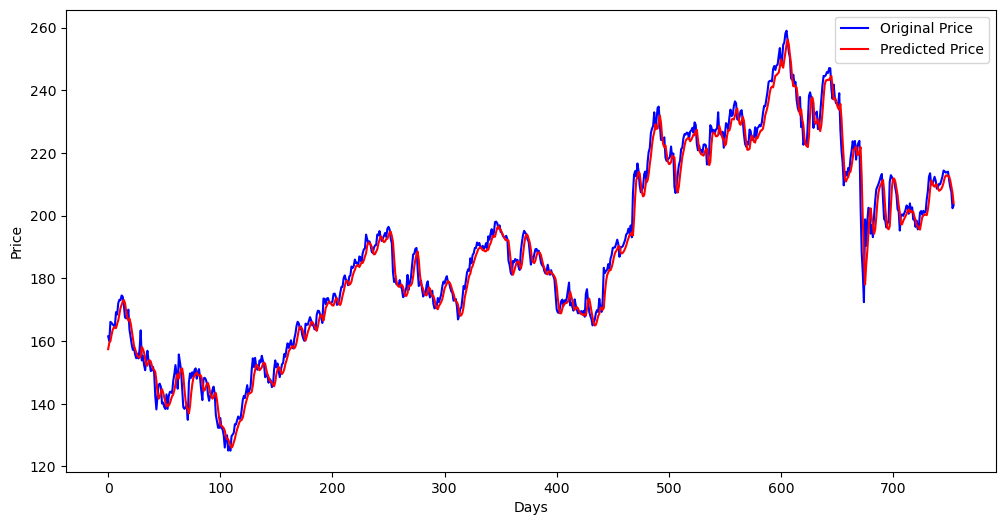

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 260.0)

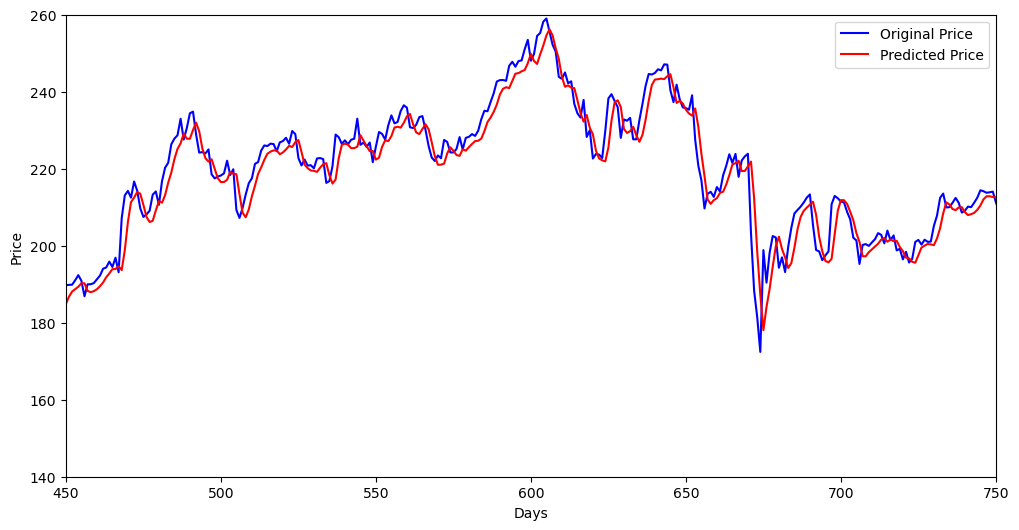

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,260)

# Model Evaluation

In [69]:
# Mean Square Error(MSE)
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
mse = mean_squared_error(y_test,y_predicted)
print(mse)

16.19129011474198


In [71]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
print(rmse)

4.02384021983254


In [72]:
# R-Squared
r2 = r2_score(y_test,y_predicted)
print(r2)

0.9827055722205229
